In [1]:
import pandas as pd

In [2]:
from sklearn.decomposition import PCA

In [3]:
df = pd.read_csv("https://bit.ly/2FkIaTv", sep="\t", index_col="名稱")

In [4]:
df_y=df.iloc[:,0]
df_x=df.iloc[:,1:]

In [5]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
Z=sc.fit_transform(df_x)

In [6]:
# 我們只要最大的兩個主成分。scikit-learn 會自動幫我們
# 依照 eigenvalue 的大小排序共變異數矩陣的 eigenvectors
n_components = 3
random_state = 9527

In [7]:
pca = PCA(n_components=n_components, 
          random_state=random_state)

In [8]:
# 注意我們是對正規化後的特徵 Z 做 PCA
L = pca.fit_transform(Z)  # (n_samples, n_components)

In [9]:
L

array([[-2.39978208,  3.26359899,  0.29350639],
       [ 2.37995323, -0.28613516,  1.34680345],
       [-3.28816922,  1.4106088 ,  2.11721013],
       [-1.69101467, -2.37471999,  0.63220725],
       [-1.22971682, -0.61449092, -0.30261021],
       [ 3.75134435,  0.34419776,  0.03229301],
       [ 2.83233597,  0.10560262,  1.15452439],
       [ 2.93989357,  1.18704826, -0.56992509],
       [ 1.99741606,  1.34963784, -0.39723655],
       [ 2.01634406, -1.17330611,  0.87036718],
       [ 1.96563629, -0.44193762,  1.8139099 ],
       [ 1.32313935, -0.41921659, -0.32498665],
       [-1.33828047, -1.55088631, -0.27408294],
       [ 1.92395599,  0.39375324,  0.836851  ],
       [-1.3426964 , -1.77553415, -0.39099477],
       [ 2.55710479,  0.81119973, -0.26430426],
       [-1.74003983, -0.97361262, -0.87614866],
       [ 2.27519512, -0.58762073,  0.89794787],
       [-2.43960464, -0.20491809, -1.68907394],
       [ 2.24509821,  0.40863012, -0.1106408 ],
       [-2.72199109, -0.80830443,  0.729

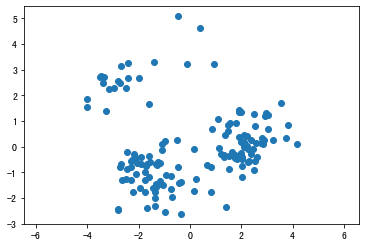

In [10]:
import matplotlib.pyplot as plt
plt.scatter(L[:, 0], L[:, 1])
plt.axis('equal');

In [11]:
pca.components_#選出來的前兩大主成份

array([[ 0.42983827,  0.28354373,  0.19094454,  0.14312443, -0.14051295,
        -0.31569403, -0.30611283, -0.33330987, -0.35045703, -0.34125548,
        -0.33825289],
       [ 0.07159365, -0.42951637, -0.56193725, -0.50440682, -0.32344698,
        -0.2437125 , -0.20875047,  0.01381896, -0.02114543, -0.0801833 ,
        -0.15978857],
       [ 0.15630374, -0.00584495, -0.04095984, -0.43345392,  0.68684324,
         0.15985122,  0.17580406,  0.0885914 , -0.23429038, -0.44157845,
        -0.00546871]])

In [12]:
import numpy as np
pcs = np.array(pca.components_) # (n_comp, n_features)

df_pc = pd.DataFrame(pcs, columns=df.columns[1:])
df_pc.index = [f"第{c}主成分" for c in['一', '二','三']]
df_pc.style\
    .background_gradient(cmap='bwr_r', axis=None)\
    .format("{:.2}")

,攻擊距離,魔力,魔力回復,魔力提升,生命提升,生命,生命回復,移動速度,物理攻擊,物理防禦,魔法防禦
第一主成分,0.43,0.28,0.19,0.14,-0.14,-0.32,-0.31,-0.33,-0.35,-0.34,-0.34
第二主成分,0.072,-0.43,-0.56,-0.5,-0.32,-0.24,-0.21,0.014,-0.021,-0.08,-0.16
第三主成分,0.16,-0.0058,-0.041,-0.43,0.69,0.16,0.18,0.089,-0.23,-0.44,-0.0055
